# Exercise 5

This week we will practice how to create static and interactive maps using Python. The goal of this exercise is to allow you to focus on cartographic visualization with Python, and to play around and explore different possibilities of the available visualization packages.

## Problem 1: Visualize a static map (8 points)

Create a static map using the skills you leared in lesson 5. The map should contain multiple layers of data (at least two different data sets), and you should pay attention to the classification and visualization (colors, edges etc.) when creating the map. Write your code into a notebook file (`.ipynb`) or a python script file (`.py`) and store the output map(s) in `.png` format into the `docs` folder.

__Topic of the map__:
- You can either use the data sets we have already used during this course (eg. the Travel Time Matrix, or population grid), or you can select some other data set of your interest (for example, statistics in postal code areas).
- Feel free to adapt examples provided in this course! You can do further calculations based on the datasets or use the analysis outputs that we have done earlier in the course (for example, the dominance areas or travel times for shopping centers).

__Criteria__:
- The map should have multiple layers on it (for example, the travel time matrix and the road network). Basemap is optional (use a basemap only if it adds useful information / visual touch!)
- The map should portray some kind of classification and/or an analysis output (not just the raw data).
- Consider [good cartographic practices](https://www.gislounge.com/ten-things-to-consider-when-making-a-map/) (map extent, zoom level, color choices, legend, credit data sources etc.) when plotting the map.

__Output__:
- Remember to commit the code and input data (or at least a link to input data)
- Save your map(s) as png image in the __`docs`__ folder

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

__Background__:

The two datasets chosen for this problem are the __New York City__'s [Citi Bike System Data](https://ride.citibikenyc.com/system-data) and [Subway Lines Shapefile](https://data.cityofnewyork.us/Transportation/Subway-Lines/3qz8-muuu). The steps followed are outlined in the next sections and subsequently throughout the notebook.

__Steps__:
- The first step is to manually download the Subway Line Shapefile which is saved in the `data` folder.
- The second step is to download the Citi Bike System Data directly from the website.

In [2]:
# Get the data
!rm data/202209-citibike-tripdata.csv
!rm -r data/__MACOSX
!wget https://s3.amazonaws.com/tripdata/202209-citibike-tripdata.csv.zip
!unzip 202209-citibike-tripdata.csv.zip -d data
!rm 202209-citibike-tripdata.csv.zip

--2022-10-12 22:44:07--  https://s3.amazonaws.com/tripdata/202209-citibike-tripdata.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.170.157
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.170.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124551873 (119M) [application/zip]
Saving to: ‘202209-citibike-tripdata.csv.zip’

202209-citibike-tri 100%[===================>] 118.78M  4.19MB/s    in 24s     

2022-10-12 22:44:31 (5.05 MB/s) - ‘202209-citibike-tripdata.csv.zip’ saved [124551873/124551873]

Archive:  202209-citibike-tripdata.csv.zip
  inflating: data/202209-citibike-tripdata.csv  
  inflating: data/__MACOSX/._202209-citibike-tripdata.csv  


- The third step is to read in the data and the shapefile, and make sure that they are loaded properly

In [3]:
# Read the data
citibike_fp = "data/202209-citibike-tripdata.csv"
metro_fp = "data/geo_export_8b0bf950-6749-4f44-99a0-3bfc0a30bd0e.shp"
citibike = pd.read_csv(citibike_fp, low_memory=False)
metro = gpd.read_file(metro_fp)

In [4]:
# Check the citibike DataFrame
citibike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,42B9E1161E021F66,classic_bike,2022-09-17 16:06:45,2022-09-17 16:18:03,Henry St & Degraw St,4380.08,7 Ave & Park Pl,4125.07,40.684736,-73.999088,40.677615,-73.973243,member
1,FE5FB109CA0FB68B,classic_bike,2022-09-25 14:26:25,2022-09-25 14:39:43,6 Ave & W 34 St,6364.10,W 50 St & 9 Ave,6854.05,40.749640,-73.988050,40.763605,-73.989180,member
2,D4E9E27DCE9CC556,classic_bike,2022-09-15 13:25:37,2022-09-15 13:51:35,6 Ave & W 34 St,6364.10,5 Ave & E 78 St,7161.08,40.749640,-73.988050,40.776321,-73.964274,member
3,757BFFFB009E8D21,classic_bike,2022-09-16 18:46:33,2022-09-16 18:52:42,48 St & 5 Ave,3202.06,36 St & 4 Ave,3420.01,40.646351,-74.009271,40.654144,-74.004220,member
4,4E6360AD2986736E,classic_bike,2022-09-10 09:20:56,2022-09-10 09:30:20,Steinway St & Ditmars Blvd,7074.01,Crescent St & 30 Ave,6958.06,40.772621,-73.906240,40.768692,-73.924957,member


In [5]:
# Check the metro GeoDataFrame
metro.head()

,id,name,objectid,rt_symbol,shape_len,url,geometry
0,2000393.0,G,753.0,G,2438.200249,http://web.mta.info/nyct/service/,"LINESTRING (-73.99488 40.68020, -73.99427 40.6..."
1,2000394.0,G,754.0,G,3872.834411,http://web.mta.info/nyct/service/,"LINESTRING (-73.97958 40.65993, -73.97966 40.6..."
2,2000469.0,Q,755.0,N,1843.366331,http://web.mta.info/nyct/service/,"LINESTRING (-73.97586 40.57597, -73.97654 40.5..."
3,2000294.0,M,756.0,B,1919.559203,http://web.mta.info/nyct/service/,"LINESTRING (-73.92414 40.75229, -73.92405 40.7..."
4,2000296.0,M,757.0,B,2385.698536,http://web.mta.info/nyct/service/,"LINESTRING (-73.91345 40.75617, -73.90905 40.7..."


In [6]:
# Check the size and shape of the data
print(f"The size of the citybike data is: {citibike.size:,}")
print(f"The shape of the citibike data is: {citibike.shape}")

The size of the citybike data is: 45,592,599
The shape of the citibike data is: (3507123, 13)


In [7]:
# Check the data basic information
citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507123 entries, 0 to 3507122
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 347.8+ MB


- The fourth step is to create a GeoDataFrame out of the citibike DataFrame

In [8]:
# Divide the data into starting and ending stations
start_station = citibike[["ride_id", "start_station_id", "start_lat", "start_lng"]].copy()

In [9]:
# Add geometry feature to the dataframes
start_station["geometry"] = start_station.apply(lambda row: Point(row["start_lng"], row["start_lat"]), axis=1)

/Users/gonetybo/Documents/Professional/Learning/ossu/datacamp/projects/venv/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [10]:
# Check the start_station DataFrames
start_station.head()

,ride_id,start_station_id,start_lat,start_lng,geometry
0,42B9E1161E021F66,4380.08,40.684736,-73.999088,POINT (-73.999087811 40.684736013)
1,FE5FB109CA0FB68B,6364.10,40.749640,-73.988050,POINT (-73.98805 40.74964)
2,D4E9E27DCE9CC556,6364.10,40.749640,-73.988050,POINT (-73.98805 40.74964)
3,757BFFFB009E8D21,3202.06,40.646351,-74.009271,POINT (-74.009271 40.646351)
4,4E6360AD2986736E,7074.01,40.772621,-73.906240,POINT (-73.906240106 40.772621155)


In [11]:
# Convert DataFrames into GeoDataFrames
geo_start_station = gpd.GeoDataFrame(start_station, geometry="geometry", crs=metro.crs)

In [12]:
# Check the geo_end_station GeoDataFrame
geo_start_station.head()

,ride_id,start_station_id,start_lat,start_lng,geometry
0,42B9E1161E021F66,4380.08,40.684736,-73.999088,POINT (-73.99909 40.68474)
1,FE5FB109CA0FB68B,6364.10,40.749640,-73.988050,POINT (-73.98805 40.74964)
2,D4E9E27DCE9CC556,6364.10,40.749640,-73.988050,POINT (-73.98805 40.74964)
3,757BFFFB009E8D21,3202.06,40.646351,-74.009271,POINT (-74.00927 40.64635)
4,4E6360AD2986736E,7074.01,40.772621,-73.906240,POINT (-73.90624 40.77262)


- The fifth and last step of this problem is to create map of the data that highlights starting stations, categories of the duration of the ride and the metro lines

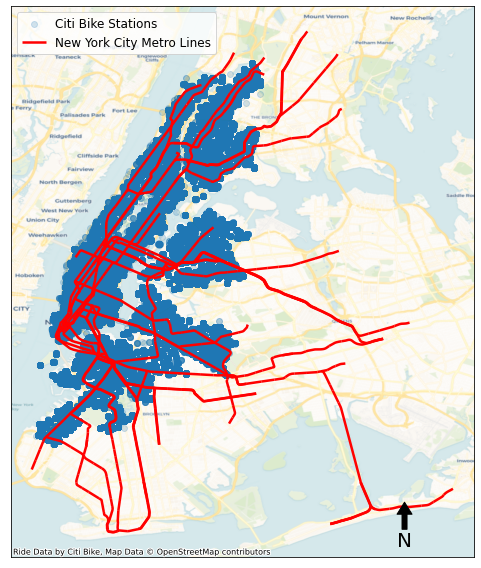

In [13]:
# Create one subplot with specified figure size
fig, ax = plt.subplots(figsize=(12, 8))
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

# Visualize ride duration using "Quantiles" classification scheme
geo_start_station.plot(ax=ax, alpha=0.2, label="Citi Bike Stations")

# Add north arrow, https://stackoverflow.com/a/58110049/604456
x, y, arrow_length = 0.85, 0.10, 0.07
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

# Add metro on top of previous map
metro.plot(ax=ax, color="red", linewidth=2.5, label="New York City Metro Lines")

# Add basemap
credits = "Ride Data by Citi Bike, Map Data © OpenStreetMap contributors"
ctx.add_basemap(ax, crs=metro.crs.to_string(), source=ctx.providers.CartoDB.Voyager, zoom=12, attribution=credits)

# Make a legend
ax.legend(loc='upper left', prop={'size': 12})

# Remove the empty white-space around the axes
plt.tight_layout()

# Save output map
out_fp = "docs/nyc_bike_metro_static_map.png"
fig.savefig(out_fp, dpi=300)